In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

In [16]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [28]:
iris_target=pd.Series(iris.target)
iris_target.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"]=iris_target

In [40]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


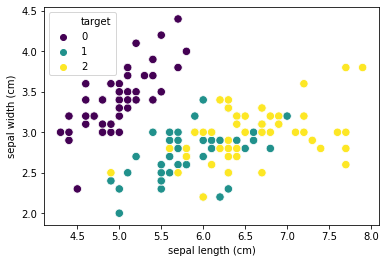

In [68]:
sns.scatterplot(x=df["sepal length (cm)"], y=df["sepal width (cm)"], hue=Y, palette="viridis" , s=70);

In [41]:
Y=df["target"]
X=df[["sepal length (cm)","sepal width (cm)"]]

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### One & Rest Logistic Regression

In [44]:
log_reg=LogisticRegression()

log_reg.fit(X_train,Y_train)

LogisticRegression()

In [45]:
y_train_pred=log_reg.predict(X_train)
y_test_pred=log_reg.predict(X_test)

In [46]:
print("Accuracy of the X_train: {}". format(log_reg.score(X_train,Y_train)))
print("Accuracy of the X_test: {}". format(log_reg.score(X_test,Y_test)))

Accuracy of the X_train: 0.8
Accuracy of the X_test: 0.9


In [85]:
predictions=log_reg.predict([[5.3,3.6],[6.8,3.8],[6.1,3.1]])
predictions

array([0, 2, 1])

Error train set: 0.0000
Error test set: 0.0000 


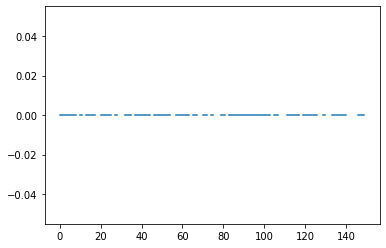

In [95]:
error_train=Y-Y_train
error_test=Y-Y_test
print("Error train set: {:.4f}".format(np.mean(error_train)))
print("Error test set: {:.4f} ". format(np.mean(error_test)))

plt.plot(error_train);

### Multinomial Logistic Regression

In [100]:
log_reg_multi=LogisticRegression(multi_class="multinomial", solver="lbfgs")

In [101]:
X_train_multi, X_test_multi, Y_train_multi, Y_test_multi =train_test_split(X,Y,test_size=0.20, random_state=42)

In [102]:
log_reg_multi.fit(X_train_multi,Y_train_multi)

LogisticRegression(multi_class='multinomial')

In [109]:
print("Multinomial accuracy of the train set: {:.4f}". format(log_reg_multi.score(X_train_multi,Y_train_multi)))
print("Multinomial accuracy of the test set: {:.4f}". format(log_reg_multi.score(X_test_multi,Y_test_multi)))

Multinomial accuracy of the train set: 0.8000
Multinomial accuracy of the test set: 0.9000


#### Different C parameters

In [111]:
c=[10**i for i in range(-4,4)]
df=pd.DataFrame(columns=["c","train_accuracy","test_accuracy"])


for j in range(len(c)):
    log_reg=LogisticRegression(penalty="l2", C=c[j])
    log_reg.fit(X_train,Y_train)
    df=df.append({"c":c[j],
              "train_accuracy":log_reg.score(X_train,Y_train),
              "test_accuracy":log_reg.score(X_test,Y_test)}, ignore_index=True)
df

,c,train_accuracy,test_accuracy
0,0.0001,0.341667,0.300000
1,0.0010,0.666667,0.566667
2,0.0100,0.775000,0.900000
3,0.1000,0.783333,0.900000
4,1.0000,0.800000,0.900000
5,10.0000,0.816667,0.900000
6,100.0000,0.816667,0.900000
7,1000.0000,0.816667,0.900000


The most appropriate c value is 10.